Adagrad: replacing the rather crude counter s(i, t) by an aggregate of the quares of previously observed gradients. 
In s(i, t), i is the feature, t is the count of the feature's occurence.
It uses s(i, t+1) = s(i, t) + grad(x)**2

Calculating eigenvalues by scaling and guessing rather than computing engenvalues directly.

epoch 20, x1: -2.382563, x2: -0.158591


/home/tian/anaconda3/envs/d2l/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


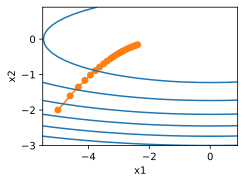

In [1]:
%matplotlib inline
import math
import torch
from d2l import torch as d2l

def adagrad_2d(x1, x2, s1, s2):
    eps = 1e-6
    g1, g2 = 0.2 * x1, 4 * x2
    s1 += g1 ** 2
    s2 += g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

eta = 0.4
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

epoch 20, x1: -0.002295, x2: -0.000000


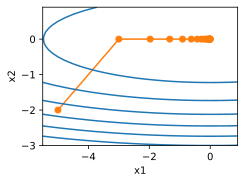

In [2]:
eta = 2
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

12.7.4. Implementation from Scratch

In [3]:
def init_adagrad_states(feature_dim):
    s_w = torch.zeros((feature_dim, 1))
    s_b = torch.zeros(1)
    return (s_w, s_b)

def adagrad(params, states, hyperparams):
    eps = 1e-6
    for p, s in zip(params, states):
        with torch.no_grad():
            s[:] += torch.square(p.grad)
            p[:] -= hyperparams['lr'] * p.grad / torch.sqrt(s + eps)
        p.grad.data.zero_()

loss: 0.243, 0.017 sec/epoch


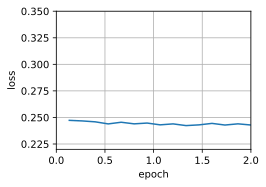

In [28]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=5)
d2l.train_ch11(adagrad, init_adagrad_states(feature_dim),
               {'lr': 0.1}, data_iter, feature_dim);

In [29]:
len(data_iter)

300

Concise Implementation

loss: 0.243, 0.017 sec/epoch


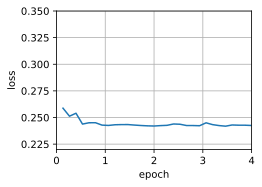

In [30]:
trainer = torch.optim.Adagrad
d2l.train_concise_ch11(trainer, {'lr': 0.1}, data_iter)